# Importing Basic Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
data = pd.read_csv('E-com_Data.csv')
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
# Data shape
print(data.shape)

(541116, 12)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [5]:
data['Cancelled_status'].value_counts()

Cancelled_status
True    8345
Name: count, dtype: int64

In [6]:
# making a copy of our dataset
data1 = data.copy()

In [7]:
# Dropping the data of cancelled orders
data = data[data['Cancelled_status'] != True]

In [8]:
# Columns used for RFM analysis grouped by CustomerID
    # Recency - Date of purchase
    # Frequency - InvoieNo
    # Monetory - Price

In [9]:
# Taking the columns needed for analysis
data = data[['CustomerID', 'InvoieNo', 'Date of purchase', 'Price']]

# Renaming the columns
data = data.rename(columns= {'InvoieNo' : 'InvoiceNo', 'Date of purchase' : 'Date'})

# Sample data
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [10]:
# Missing value
round(data.isnull().mean() * 100, 2)

CustomerID    25.67
InvoiceNo      0.59
Date           0.59
Price          0.59
dtype: float64

In [11]:
# Dropping the missing values
data = data.dropna(subset= ['CustomerID'])

# Missing value after dropping null
round(data.isnull().mean() * 100, 2)

CustomerID    0.0
InvoiceNo     0.0
Date          0.0
Price         0.0
dtype: float64

In [12]:
# Checking duplicate data
print(data.duplicated().sum())

1326


In [13]:
# Dropping duplicated data
data = data.drop_duplicates(ignore_index= False)
print(data.duplicated().sum())

0


In [14]:
# Checking data type
print(data.dtypes)

CustomerID    float64
InvoiceNo     float64
Date           object
Price         float64
dtype: object


In [15]:
# Typecasting datatypes
data['CustomerID'] = data['CustomerID'].astype(int)
data['InvoiceNo'] = data['InvoiceNo'].astype(int)
data['Date'] = pd.to_datetime(data['Date'])

# Checking data type
print(data.dtypes)

CustomerID             int64
InvoiceNo              int64
Date          datetime64[ns]
Price                float64
dtype: object


In [16]:
# data sample
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355,398177,2017-10-29,1926.0
1,4352,394422,2017-10-05,1740.0
2,4352,394422,2017-10-12,1866.0
3,4352,388633,2017-08-22,1869.0
4,4352,394422,2017-10-10,1888.0


In [17]:
# maximum date of purchase
print(data['Date'].max())

# first date of purchase
print(data['Date'].min())

2017-12-19 00:00:00
2016-12-02 00:00:00


In [18]:
# Latest date of purchase
latest_date = dt.datetime(2017, 12, 20)
print(latest_date)

2017-12-20 00:00:00


# RFM 

In [19]:
RFMScore = data.groupby('CustomerID').agg({'Date': lambda x: (latest_date - x.max()).days,
                                          'InvoiceNo': lambda x: x.count(),
                                          'Price': lambda x: x.sum()})

# Renaming the columns
RFMScore = RFMScore.rename(columns= {'Date': 'Recency', 'InvoiceNo': 'Frequency', 'Price': 'Monetory'})

# data sample
RFMScore.head()

,Recency,Frequency,Monetory
CustomerID,,,
2,4,181,550416.0
3,77,27,257404.0
4,19,72,176613.0
5,311,16,41976.0
6,37,77,166972.0


In [20]:
RFMScore.describe()

,Recency,Frequency,Monetory
count,4324.000000,4324.000000,4.324000e+03
mean,93.755319,91.276596,2.335359e+05
std,100.115549,227.271651,8.620562e+05
min,1.000000,1.000000,3.880000e+02
25%,19.000000,17.000000,3.926900e+04
50%,52.000000,41.000000,8.603350e+04
75%,143.250000,100.000000,2.105492e+05
max,381.000000,7786.000000,3.547209e+07


In [21]:
# min and max for each of the columns
for cols in RFMScore.columns:
    print(f'For {cols} the min value is {RFMScore[cols].min()} and the max value is {RFMScore[cols].max()}')

For Recency the min value is 1 and the max value is 381
For Frequency the min value is 1 and the max value is 7786
For Monetory the min value is 388.0 and the max value is 35472089.0


In [22]:
# Quantiles for splitting the data
quantile = RFMScore.quantile(q= [0.25, 0.5, 0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 19.0, 0.5: 52.0, 0.75: 143.25},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetory': {0.25: 39269.0, 0.5: 86033.5, 0.75: 210549.25}}

In [23]:
# Function for the scores

# lower the value of recency more valuable the customer is
def recency_score(x, q, d):
    if x <= d[q][0.25]:
        return 1                # higher rank
    elif x <= d[q][0.5]:
        return 2
    if x <= d[q][0.75]:
        return 3
    else:
        return 4               # lower rank

# higher the value of frequency and monetory more valuable the customer is
def freq_monet_score(x, q, d):
    if x <= d[q][0.25]:
        return 4                # lower rank
    elif x <= d[q][0.5]:
        return 3
    if x <= d[q][0.75]:
        return 2
    else:
        return 1               # higher rank

In [24]:
# columns to accomodate the scores from the function
RFMScore['R_score'] = RFMScore['Recency'].apply(recency_score, args=('Recency', quantile))
RFMScore['F_score'] = RFMScore['Frequency'].apply(freq_monet_score, args=('Frequency', quantile))
RFMScore['M_score'] = RFMScore['Monetory'].apply(freq_monet_score, args=('Monetory', quantile))

In [25]:
# RFM data sample
RFMScore.head()

,Recency,Frequency,Monetory,R_score,F_score,M_score
CustomerID,,,,,,
2,4,181,550416.0,1,1,1
3,77,27,257404.0,3,3,1
4,19,72,176613.0,1,2,2
5,311,16,41976.0,4,4,3
6,37,77,166972.0,2,2,2


In [26]:
# Loyality Score
RFMScore['Loyality_score'] = RFMScore[['R_score', 'F_score', 'M_score']].sum(axis= 1)
RFMScore.head()

,Recency,Frequency,Monetory,R_score,F_score,M_score,Loyality_score
CustomerID,,,,,,,
2,4,181,550416.0,1,1,1,3
3,77,27,257404.0,3,3,1,7
4,19,72,176613.0,1,2,2,5
5,311,16,41976.0,4,4,3,11
6,37,77,166972.0,2,2,2,6


In [27]:
# Loyality Badge
badge = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cut = pd.qcut(RFMScore.Loyality_score, 4, labels= badge)
RFMScore['Loyality_badge'] = score_cut.values

# RFM data sample
RFMScore.head()

,Recency,Frequency,Monetory,R_score,F_score,M_score,Loyality_score,Loyality_badge
CustomerID,,,,,,,,
2,4,181,550416.0,1,1,1,3,Platinum
3,77,27,257404.0,3,3,1,7,Gold
4,19,72,176613.0,1,2,2,5,Platinum
5,311,16,41976.0,4,4,3,11,Bronze
6,37,77,166972.0,2,2,2,6,Gold


In [28]:
# segmented data
segmented_data = RFMScore.reset_index()
segmented_data = segmented_data[['CustomerID', 'Recency','Frequency', 'Monetory', 'Loyality_badge']]

# segmented sample data
segmented_data.head()

,CustomerID,Recency,Frequency,Monetory,Loyality_badge
0,2,4,181,550416.0,Platinum
1,3,77,27,257404.0,Gold
2,4,19,72,176613.0,Platinum
3,5,311,16,41976.0,Bronze
4,6,37,77,166972.0,Gold


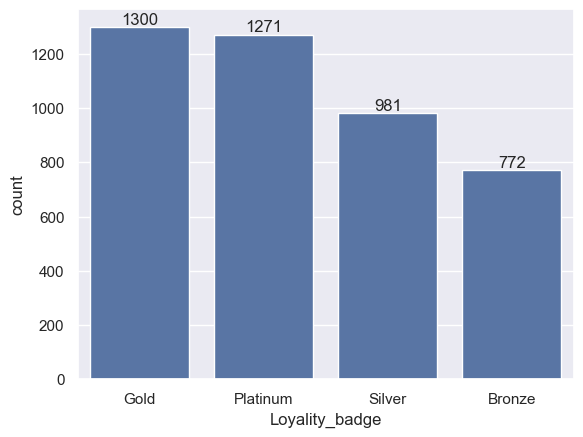

In [29]:
# Distributions of customers
ax = sns.countplot(x=segmented_data['Loyality_badge'], order= segmented_data['Loyality_badge'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [30]:
# Exporting the segmented data into csv
segmented_data.to_csv('segmented_data.csv')